In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report,
    confusion_matrix
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


In [79]:
data = pd.read_csv("D:/projects/dt/dataset.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Enrolled
1,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Enrolled
2,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Enrolled
3,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Enrolled
4,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Enrolled


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [81]:
print(data["Target"].unique())

['Enrolled' 'Graduate' 'Dropout']


In [82]:
data['Target'] = data['Target'].map({
  'Dropout':0,
  'Enrolled':1,
  'Graduate':2
})
print(data["Target"].unique())

[1 2 0]


In [83]:
data.corr()['Target']

Marital status                                    0.074310
Application mode                                  0.110086
Application order                                -0.027393
Course                                            0.009877
Daytime/evening attendance                       -0.066439
Previous qualification                            0.068021
Nacionality                                      -0.009248
Mother's qualification                            0.071100
Father's qualification                            0.033291
Mother's occupation                              -0.077593
Father's occupation                              -0.094916
Displaced                                        -0.070649
Educational special needs                        -0.003751
Debtor                                            0.154802
Tuition fees up to date                          -0.342121
Gender                                            0.118454
Scholarship holder                               -0.1145

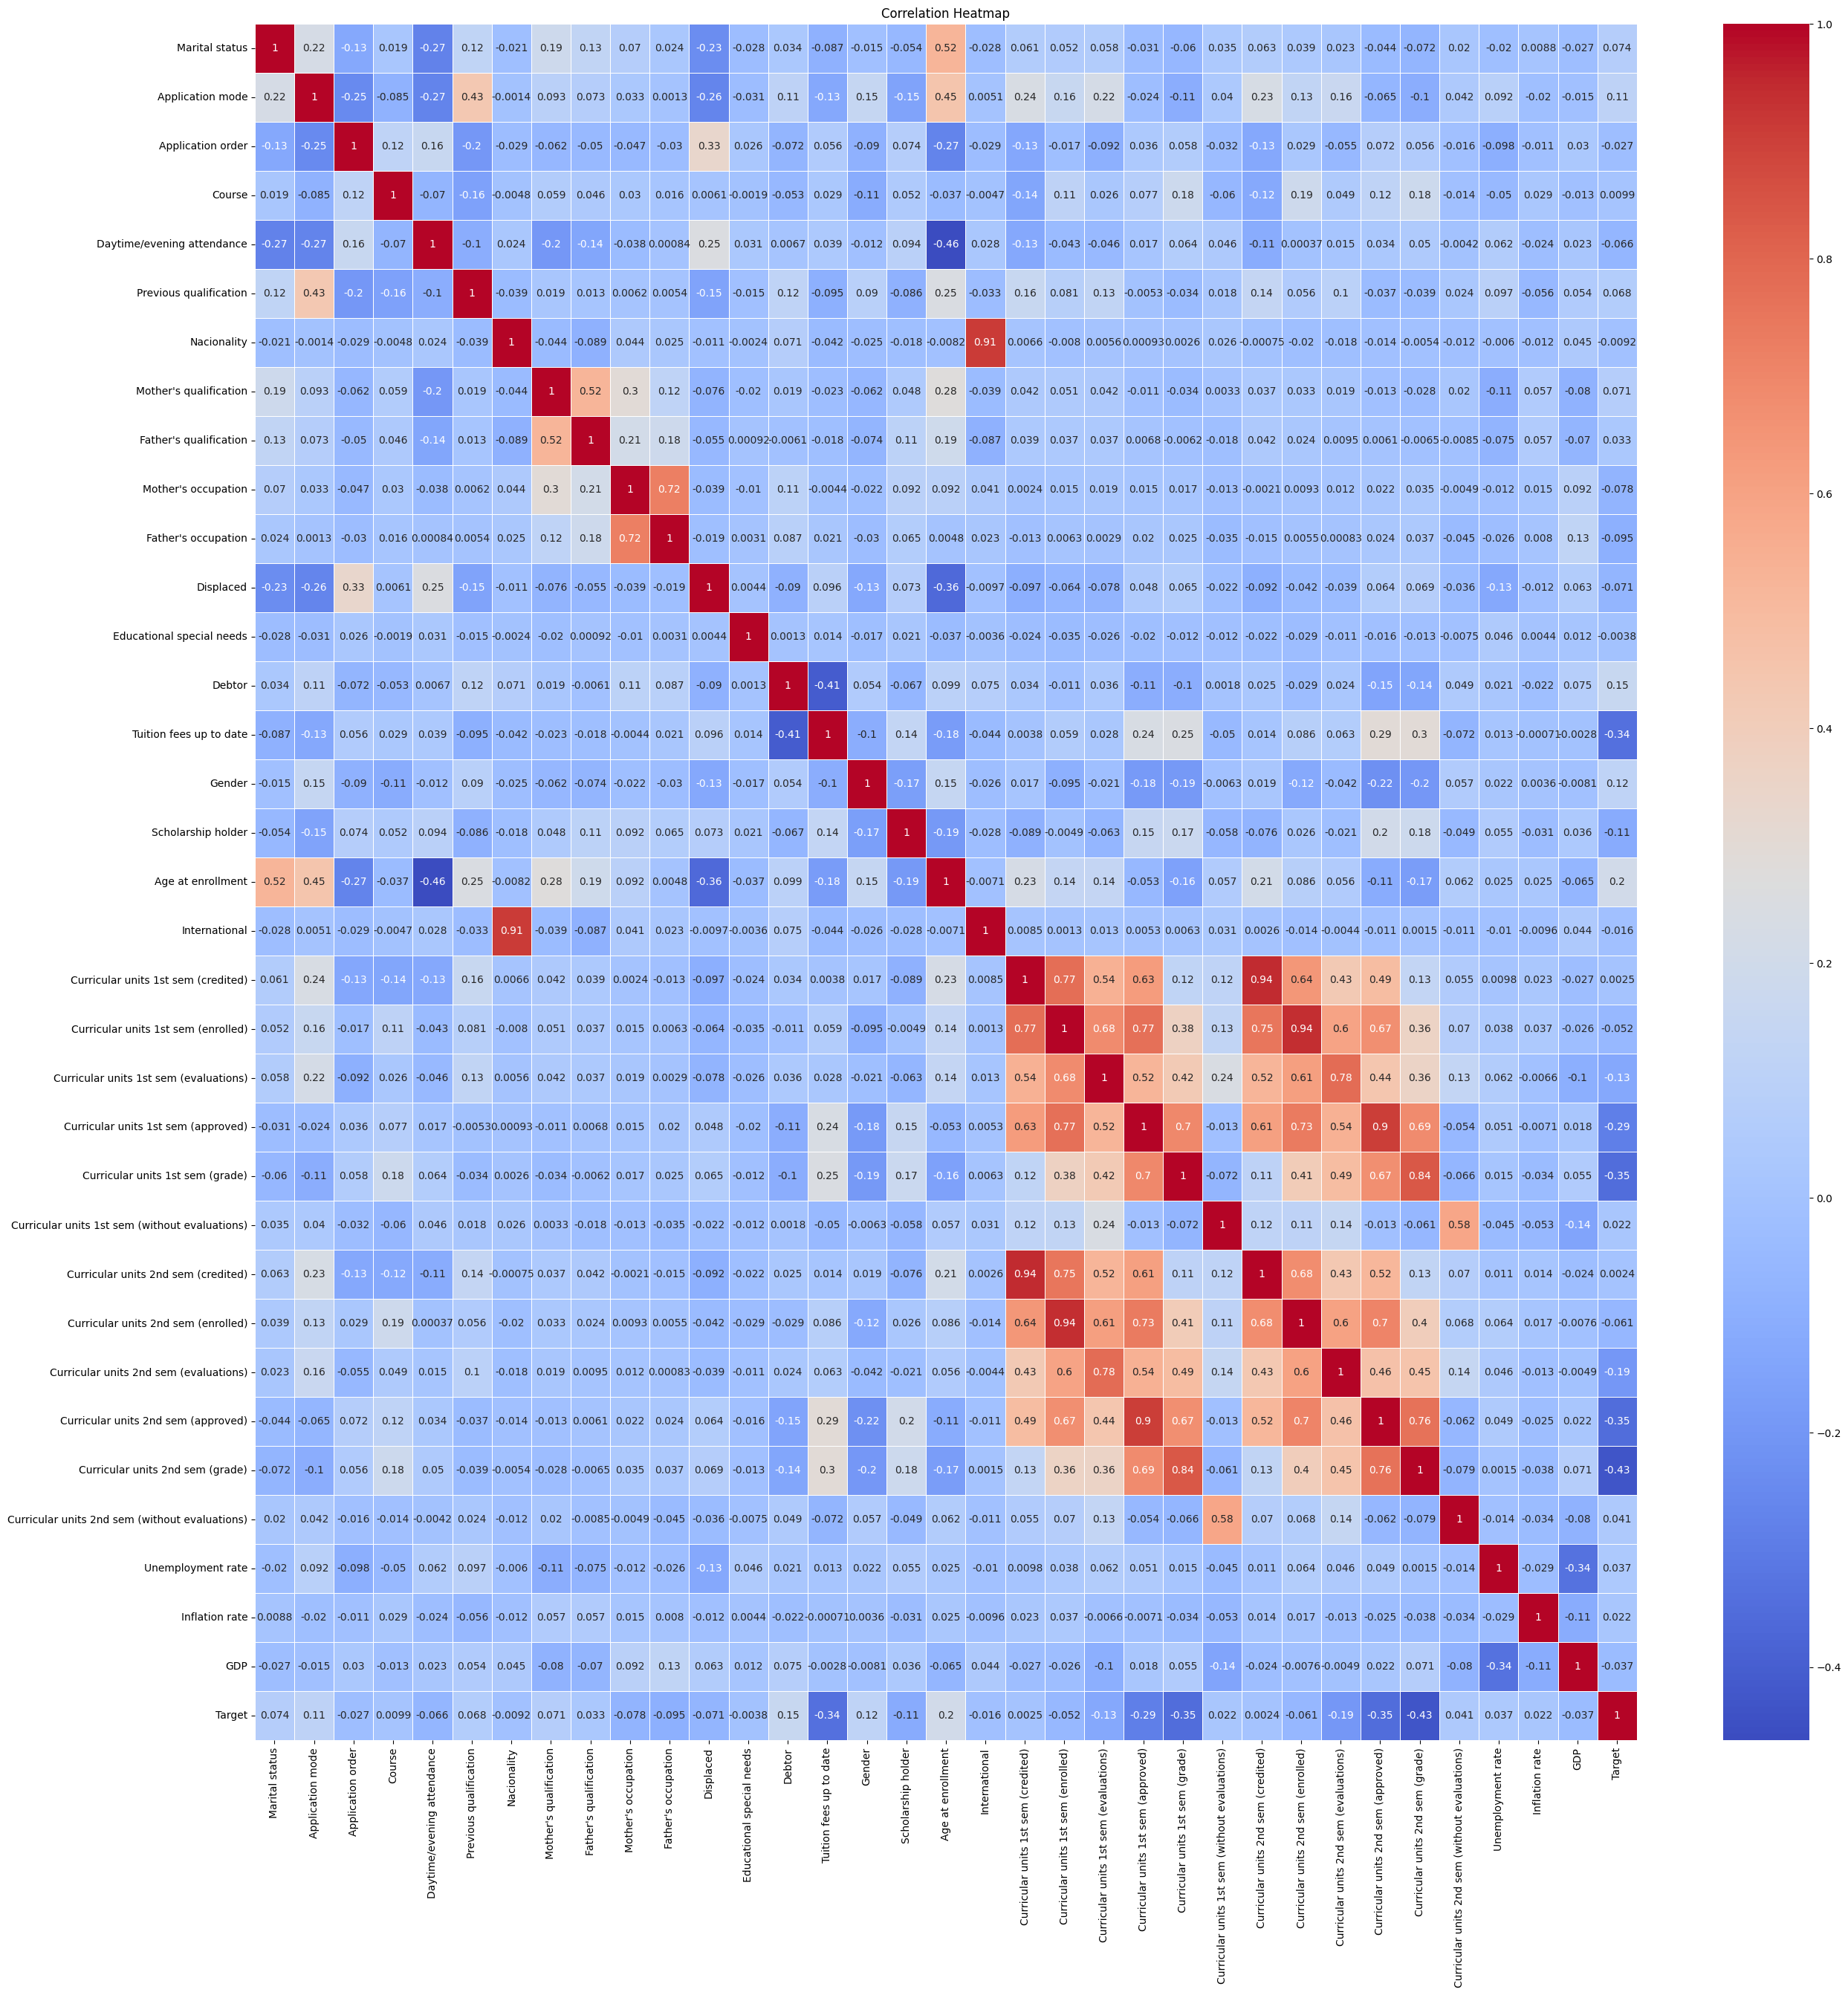

In [84]:
#correlation heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [85]:
#lowest features
correlations = data.corr()['Target']
top_10_features = correlations.abs().nsmallest(10).index
top_10_corr_values = correlations[top_10_features]
for i in range(10):
    print(top_10_features[i],'-',top_10_corr_values[i])

Curricular units 2nd sem (credited) - 0.0024272668160775935
Curricular units 1st sem (credited) - 0.0024639396702293673
Educational special needs - -0.0037511261997920774
Nacionality - -0.009247826022182699
Course - 0.009877475210117816
International - -0.015893341271952886
Curricular units 1st sem (without evaluations) - 0.021564930610866943
Inflation rate - 0.021797568994223828
Application order - -0.027392621567232125
Father's qualification - 0.0332911238103344


C:\Users\abhishek\AppData\Local\Temp\ipykernel_14040\4273617841.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



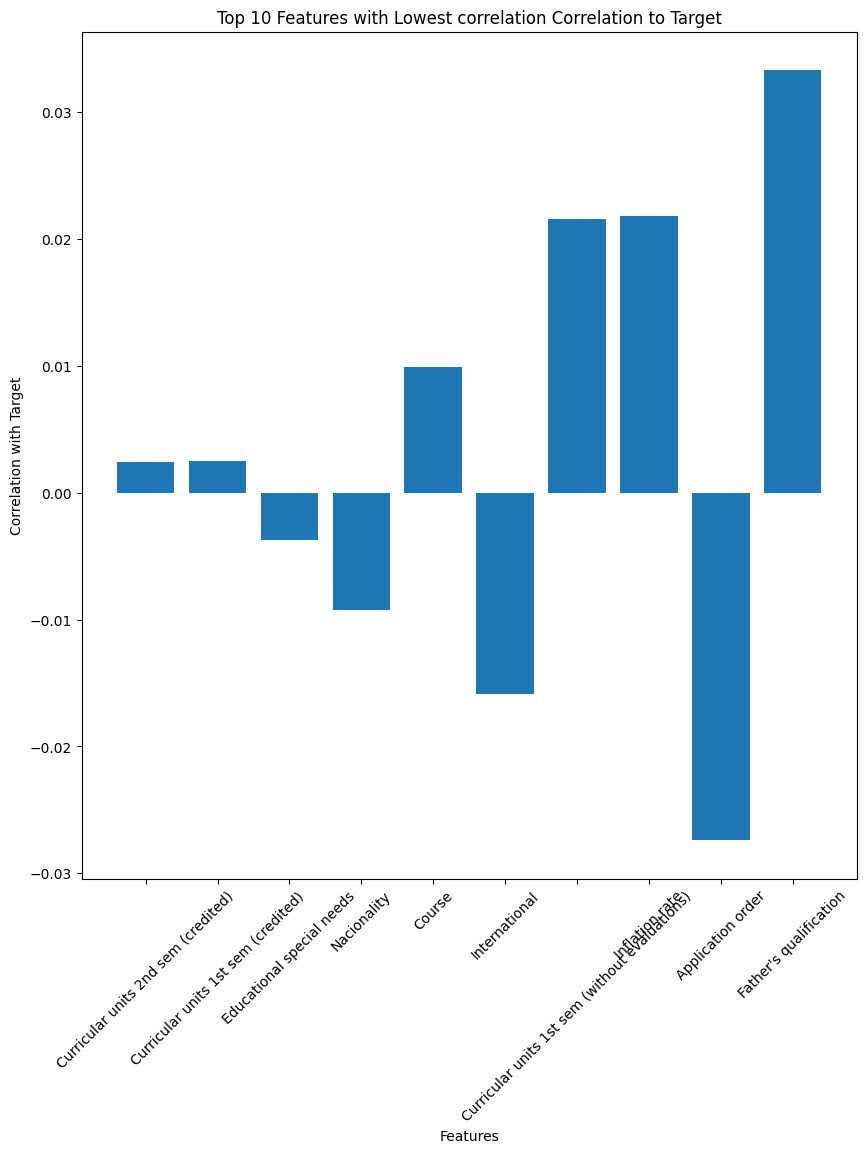

In [86]:
#barplot for lowest features
plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Features with Lowest correlation Correlation to Target')
plt.xticks(rotation=45)
plt.show()

In [87]:
#dropping few columns in our model because they are insignificant
new_data = data.copy()
new_data = new_data.drop(columns=['Nacionality', 
                 'Mother\'s qualification', 
                 'Father\'s qualification', 
                 'Educational special needs', 
                 'International', 
                 'Unemployment rate', 
                 'Inflation rate'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Mother's occupation                             4424 non-null   int64  
 7   Father's occupation                             4424 non-null   int64  
 8   Displaced                                       4424 non-null   int64  
 9   Debtor                                   

In [88]:
new_data['Target'].value_counts()

Target
1    2209
2    1421
0     794
Name: count, dtype: int64

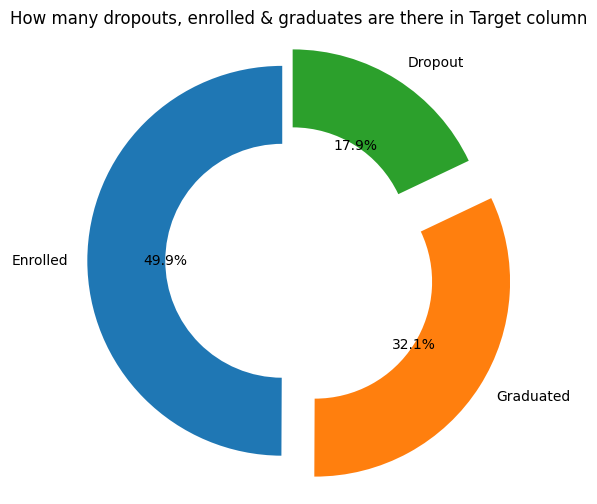

In [89]:
counts = new_data['Target'].value_counts()
labels = ['Enrolled', 'Graduated', 'Dropout']
sizes = counts.values
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.4},   # Donut effect
    explode=[0, 0.2, 0.1]         # Same pull effect
)

plt.title('How many dropouts, enrolled & graduates are there in Target column')
plt.axis('equal')
plt.show()

In [90]:
#top 10 highest features
correlations = data.corr()['Target']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]
for i in range(10):
    print(top_10_features[i],'-',top_10_corr_values[i])

Target - 1.0
Curricular units 2nd sem (grade) - -0.4292142441814479
Curricular units 2nd sem (approved) - -0.35113529228045165
Curricular units 1st sem (grade) - -0.34965164276834676
Tuition fees up to date - -0.342120547448968
Curricular units 1st sem (approved) - -0.29024327759856267
Age at enrollment - 0.20180618945687442
Curricular units 2nd sem (evaluations) - -0.1944116159981643
Debtor - 0.15480160305546845
Curricular units 1st sem (evaluations) - -0.1252778058589179


C:\Users\abhishek\AppData\Local\Temp\ipykernel_14040\4198677067.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



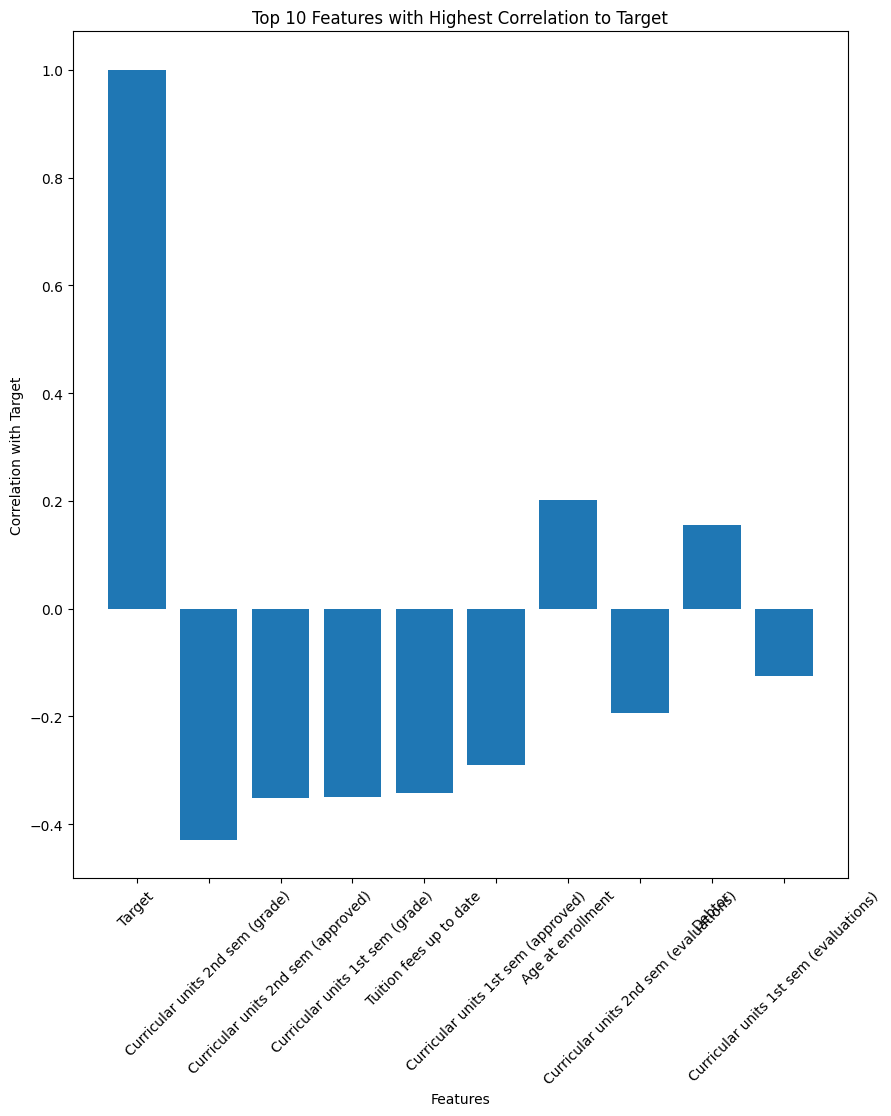

In [91]:
#bar plot for that
plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Features with Highest Correlation to Target')
plt.xticks(rotation=45)
plt.show()

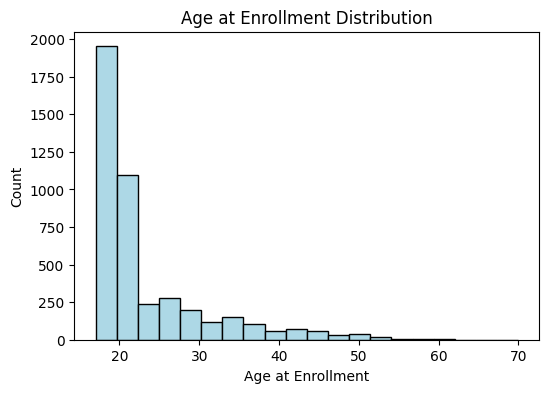

In [98]:
plt.figure(figsize=(6,4))
plt.hist(
    new_data['Age at enrollment'],
    bins=20,
    color='lightblue',
    edgecolor='black'
)

plt.title('Age at Enrollment Distribution')
plt.xlabel('Age at Enrollment')
plt.ylabel('Count')
plt.show()

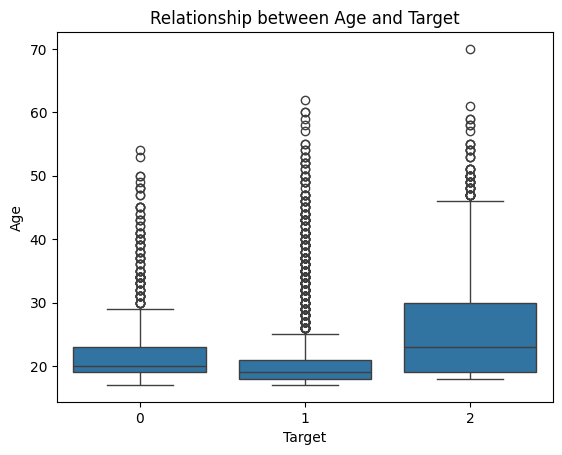

In [93]:
sns.boxplot(x='Target', y='Age at enrollment', data=new_data)
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Relationship between Age and Target')
plt.show()

In [94]:
#training and testing the models
X = new_data.drop('Target', axis=1)
y = new_data['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_test_array = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

In [99]:
def evaluate_model(name, y_true, y_pred, y_prob=None):
    print(f"\n================ {name} ================")
    
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_true, y_pred, average='weighted'))

    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix – {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [100]:
models = {
    "Logistic Regression": {
        "model": LogisticRegression(class_weight='balanced', max_iter=1000),
        "params": {
            "C": np.logspace(-2, 2, 10)
        },
        "search": "grid",
        "importance": "coef"
    },

    "Decision Tree": {
        "model": DecisionTreeClassifier(class_weight='balanced', random_state=42),
        "params": {
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10]
        },
        "search": "grid",
        "importance": "tree"
    },

    "Random Forest": {
        "model": RandomForestClassifier(class_weight='balanced', random_state=42),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        },
        "search": "random",
        "importance": "tree"
    },

    "XGBoost": {
        "model": XGBClassifier(
            scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
            eval_metric="logloss",
            random_state=42
        ),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.05, 0.1]
        },
        "search": "random",
        "importance": "tree"
    },

    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": list(range(3, 21)),
            "weights": ["uniform", "distance"]
        },
        "search": "grid",
        "importance": None
    },

    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 1]
        },
        "search": "random",
        "importance": "tree"
    },

    "SVM": {
        "model": SVC(probability=True, class_weight='balanced'),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"]
        },
        "search": "grid",
        "importance": "linear_only"
    }
}



🔹 Training Logistic Regression


e:\python\Lib\site-packages\sklearn\model_selection\_search.py:1137: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]




================ Logistic Regression ================
Accuracy : 0.7423728813559322
Precision: 0.7649741971499923
Recall   : 0.7423728813559322
F1 Score : 0.750312706390441

Classification Report:

              precision    recall  f1-score   support

           0       0.45      0.60      0.51       160
           1       0.85      0.82      0.84       442
           2       0.80      0.70      0.75       283

    accuracy                           0.74       885
   macro avg       0.70      0.71      0.70       885
weighted avg       0.76      0.74      0.75       885



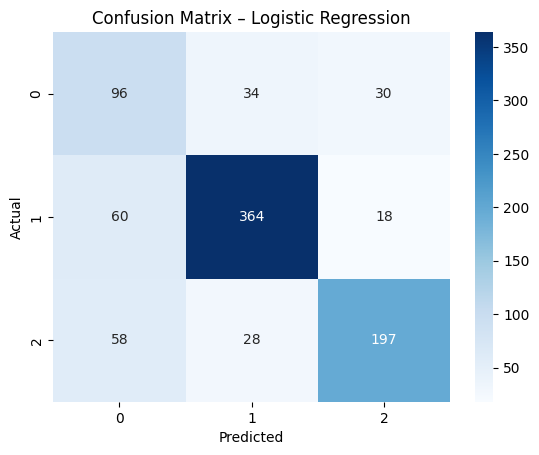

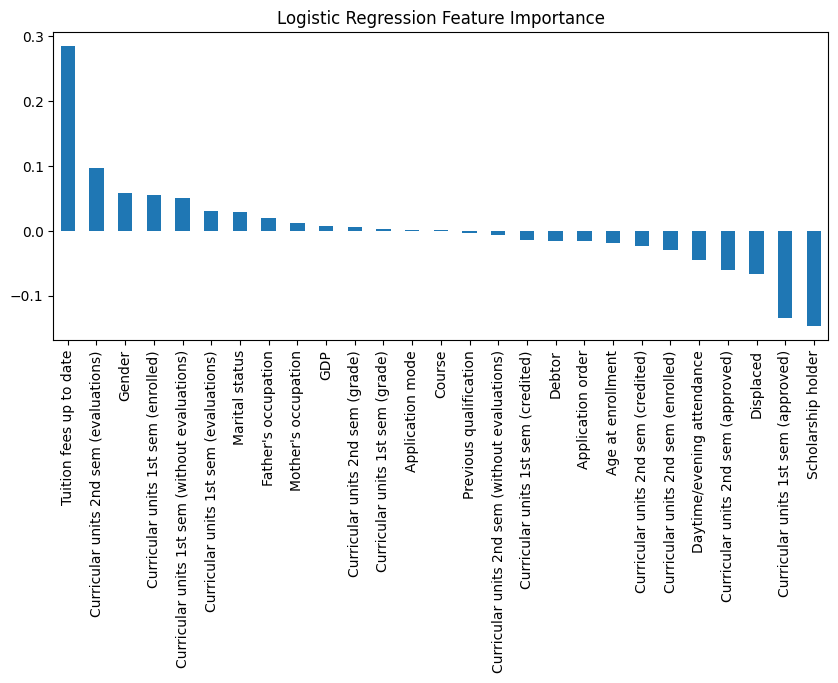


🔹 Training Decision Tree


e:\python\Lib\site-packages\sklearn\model_selection\_search.py:1137: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]




================ Decision Tree ================
Accuracy : 0.6711864406779661
Precision: 0.6750801017079326
Recall   : 0.6711864406779661
F1 Score : 0.6727894829149119

Classification Report:

              precision    recall  f1-score   support

           0       0.36      0.37      0.36       160
           1       0.79      0.76      0.77       442
           2       0.67      0.71      0.69       283

    accuracy                           0.67       885
   macro avg       0.61      0.61      0.61       885
weighted avg       0.68      0.67      0.67       885



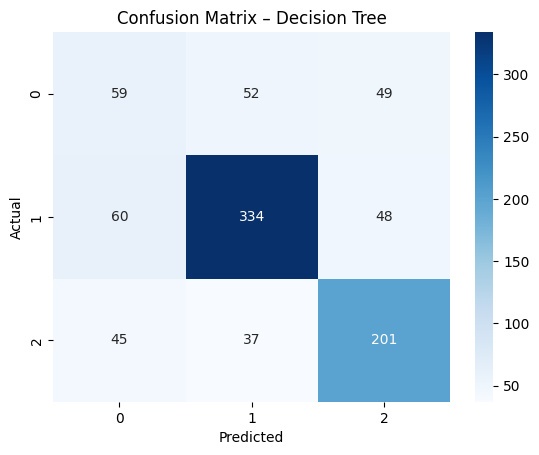

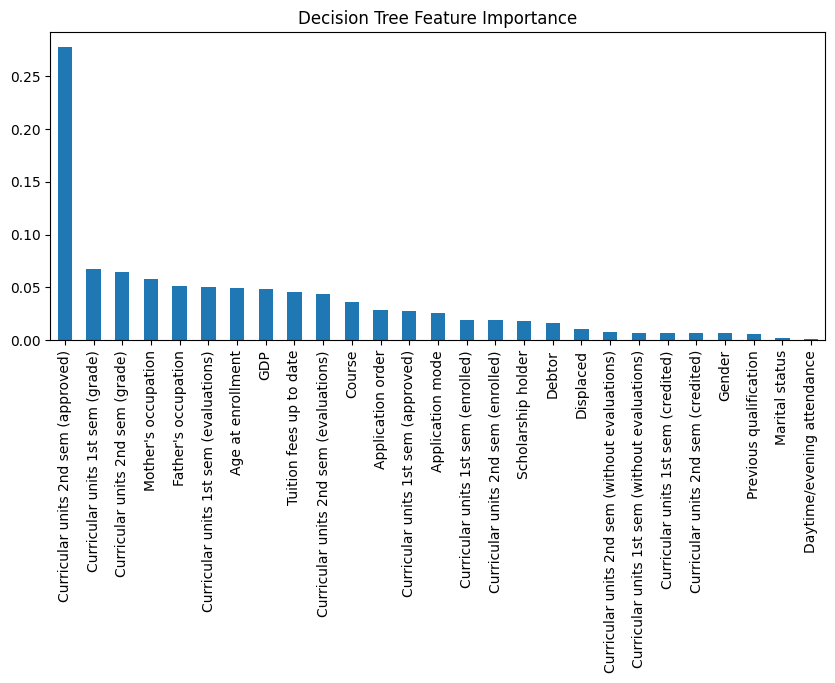


🔹 Training Random Forest


e:\python\Lib\site-packages\sklearn\model_selection\_search.py:1137: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]




================ Random Forest ================
Accuracy : 0.7796610169491526
Precision: 0.7669382937079727
Recall   : 0.7796610169491526
F1 Score : 0.7667887840195292

Classification Report:

              precision    recall  f1-score   support

           0       0.59      0.39      0.47       160
           1       0.80      0.94      0.87       442
           2       0.81      0.75      0.78       283

    accuracy                           0.78       885
   macro avg       0.74      0.69      0.71       885
weighted avg       0.77      0.78      0.77       885



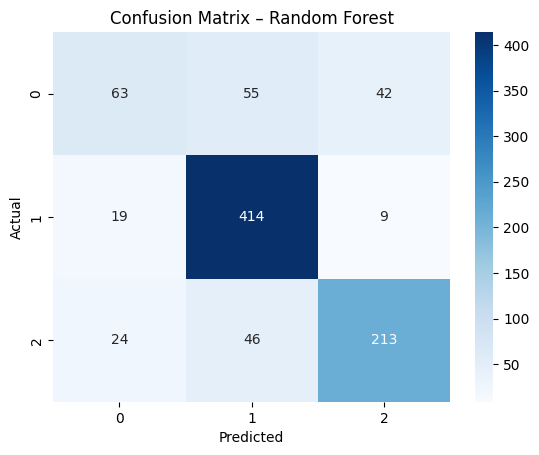

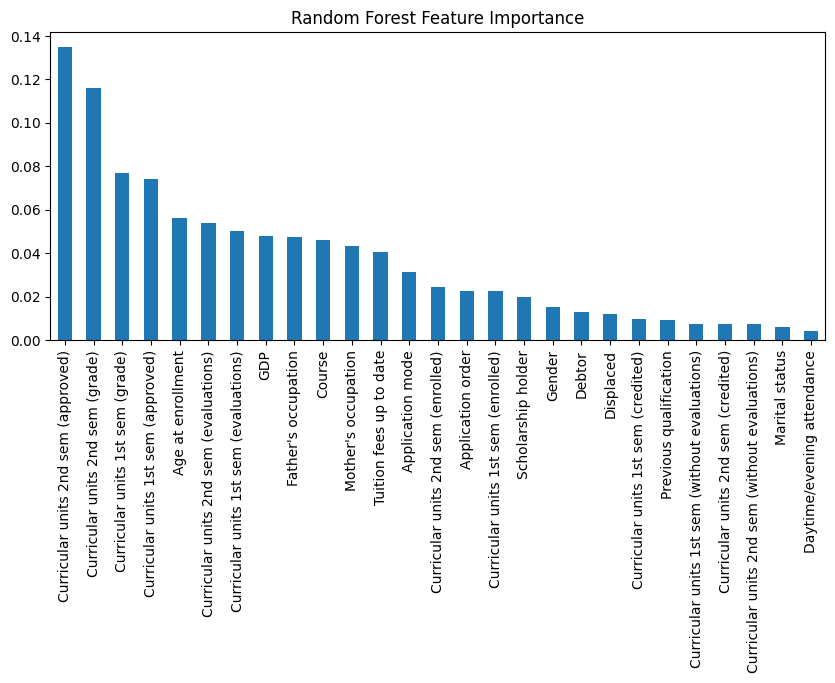


🔹 Training XGBoost


e:\python\Lib\site-packages\sklearn\model_selection\_search.py:1137: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]

e:\python\Lib\site-packages\xgboost\training.py:199: UserWarning:

[14:42:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.





================ XGBoost ================
Accuracy : 0.7751412429378531
Precision: 0.7607663671479598
Recall   : 0.7751412429378531
F1 Score : 0.7600134801089614

Classification Report:

              precision    recall  f1-score   support

           0       0.59      0.36      0.45       160
           1       0.80      0.94      0.86       442
           2       0.80      0.75      0.78       283

    accuracy                           0.78       885
   macro avg       0.73      0.68      0.70       885
weighted avg       0.76      0.78      0.76       885



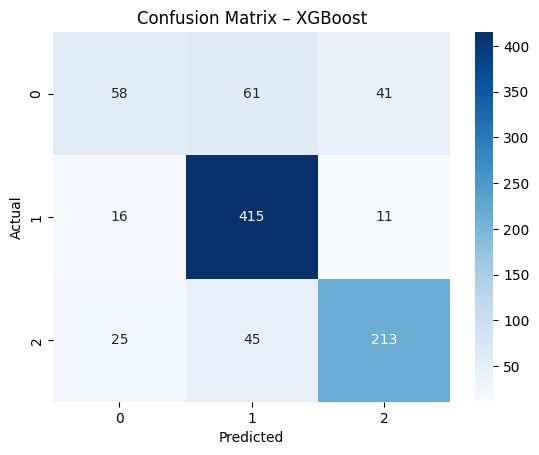

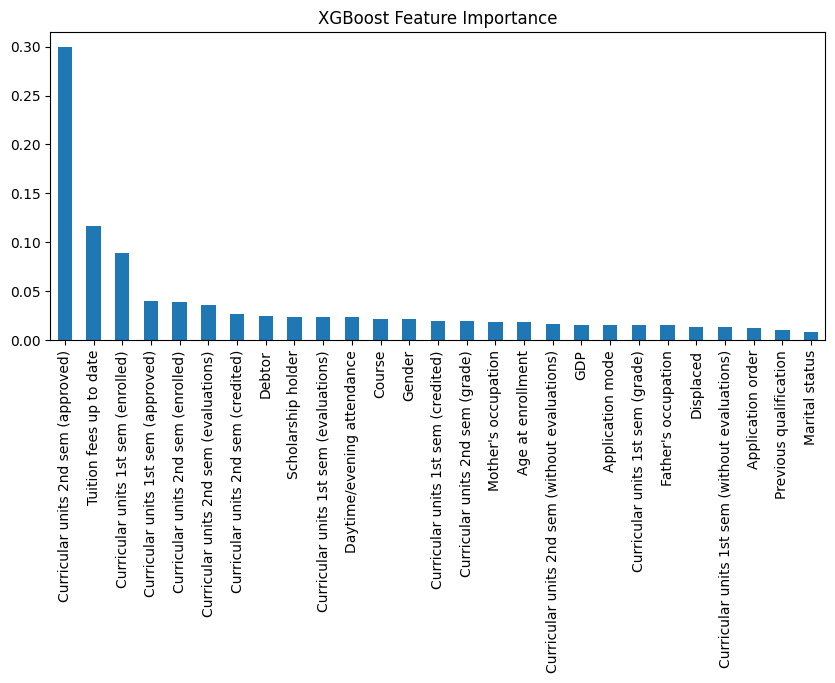


🔹 Training KNN


e:\python\Lib\site-packages\sklearn\model_selection\_search.py:1137: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]




================ KNN ================
Accuracy : 0.6937853107344633
Precision: 0.6926124473319532
Recall   : 0.6937853107344633
F1 Score : 0.6898125600900905

Classification Report:

              precision    recall  f1-score   support

           0       0.40      0.39      0.39       160
           1       0.76      0.85      0.81       442
           2       0.75      0.61      0.68       283

    accuracy                           0.69       885
   macro avg       0.64      0.62      0.63       885
weighted avg       0.69      0.69      0.69       885



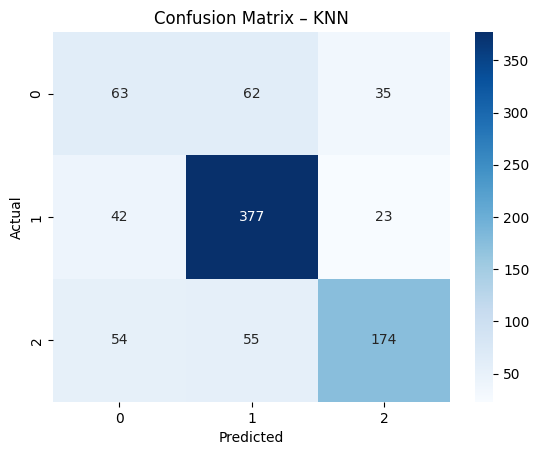


🔹 Training AdaBoost


e:\python\Lib\site-packages\sklearn\model_selection\_search.py:324: UserWarning:

The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.

e:\python\Lib\site-packages\sklearn\model_selection\_search.py:1137: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]




================ AdaBoost ================
Accuracy : 0.7096045197740113
Precision: 0.5849577470192704
Recall   : 0.7096045197740113
F1 Score : 0.6407180770412741

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       160
           1       0.77      0.90      0.83       442
           2       0.62      0.82      0.71       283

    accuracy                           0.71       885
   macro avg       0.47      0.57      0.51       885
weighted avg       0.58      0.71      0.64       885



e:\python\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

e:\python\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

e:\python\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

e:\python\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



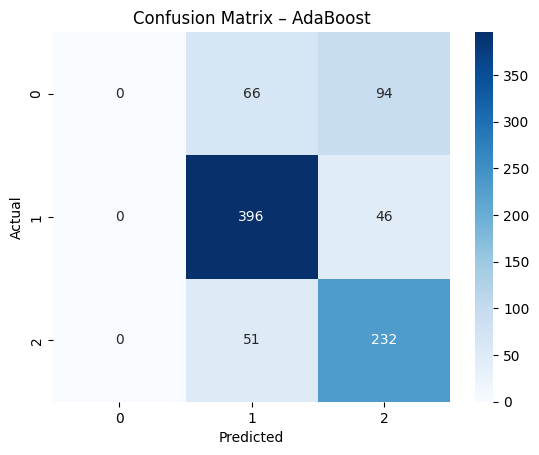

e:\python\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



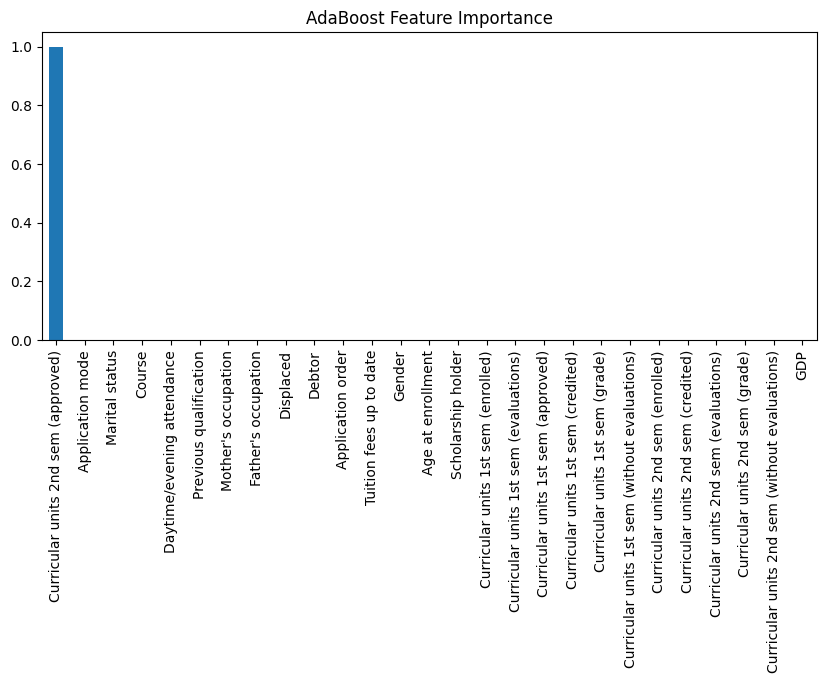


🔹 Training SVM


e:\python\Lib\site-packages\sklearn\model_selection\_search.py:1137: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan]




================ SVM ================
Accuracy : 0.7446327683615819
Precision: 0.7721195150043625
Recall   : 0.7446327683615819
F1 Score : 0.7538638727111827

Classification Report:

              precision    recall  f1-score   support

           0       0.44      0.62      0.52       160
           1       0.86      0.83      0.84       442
           2       0.82      0.69      0.75       283

    accuracy                           0.74       885
   macro avg       0.71      0.71      0.70       885
weighted avg       0.77      0.74      0.75       885



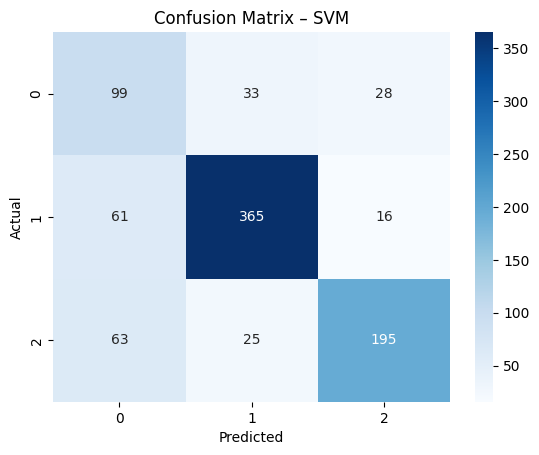

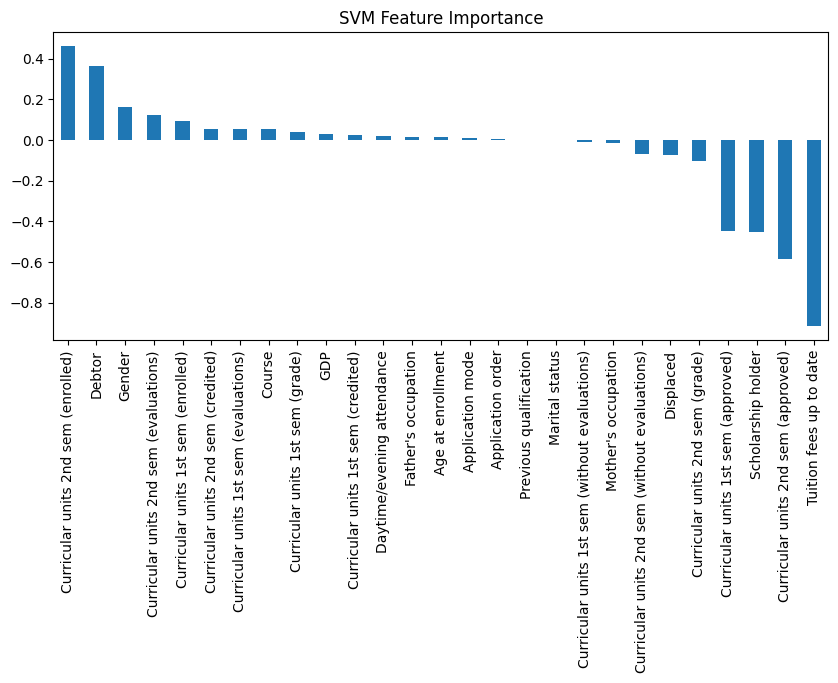

In [101]:
results = []

for name, cfg in models.items():
    print(f"\n🔹 Training {name}")

    if cfg["search"] == "grid":
        search = GridSearchCV(
            cfg["model"],
            cfg["params"],
            scoring="recall",
            cv=5,
            n_jobs=-1
        )
    else:
        search = RandomizedSearchCV(
            cfg["model"],
            cfg["params"],
            scoring="recall",
            cv=5,
            n_iter=10,
            random_state=42,
            n_jobs=-1
        )

    search.fit(X_train, y_train)
    best_model = search.best_estimator_

    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]

    evaluate_model(name, y_test, y_pred, y_prob)

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted'),
    ])

    # -------- Feature Importance --------
    if cfg["importance"] == "coef":
        importance = pd.Series(
            best_model.coef_[0],
            index=X.columns
        ).sort_values(ascending=False)

    elif cfg["importance"] == "tree":
        importance = pd.Series(
            best_model.feature_importances_,
            index=X.columns
        ).sort_values(ascending=False)

    elif cfg["importance"] == "linear_only" and best_model.kernel == "linear":
        importance = pd.Series(
            best_model.coef_[0],
            index=X.columns
        ).sort_values(ascending=False)
    else:
        continue

    importance.plot(kind="bar", figsize=(10,4), title=f"{name} Feature Importance")
    plt.show()



🔹 Soft Voting


e:\python\Lib\site-packages\xgboost\training.py:199: UserWarning:

[14:51:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.





================ Soft Voting ================
Accuracy : 0.7887005649717514
Precision: 0.7791206499593359
Recall   : 0.7887005649717514
F1 Score : 0.7810866256360715

Classification Report:

              precision    recall  f1-score   support

           0       0.58      0.46      0.52       160
           1       0.83      0.93      0.87       442
           2       0.81      0.76      0.78       283

    accuracy                           0.79       885
   macro avg       0.74      0.72      0.73       885
weighted avg       0.78      0.79      0.78       885



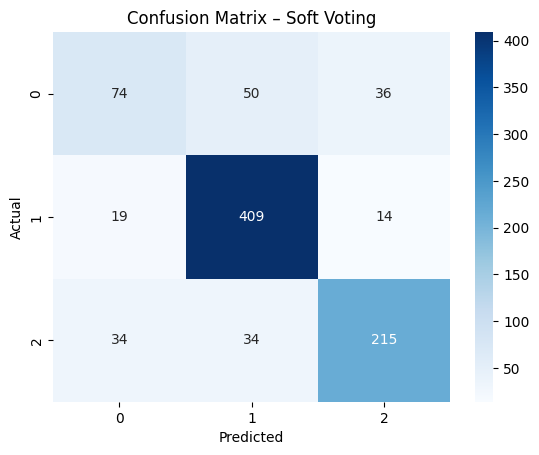


🔹 Hard Voting


e:\python\Lib\site-packages\xgboost\training.py:199: UserWarning:

[14:51:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.





================ Hard Voting ================
Accuracy : 0.7581920903954802
Precision: 0.7780818999346958
Recall   : 0.7581920903954802
F1 Score : 0.7639853960940306

Classification Report:

              precision    recall  f1-score   support

           0       0.47      0.60      0.53       160
           1       0.84      0.86      0.85       442
           2       0.86      0.70      0.77       283

    accuracy                           0.76       885
   macro avg       0.72      0.72      0.71       885
weighted avg       0.78      0.76      0.76       885



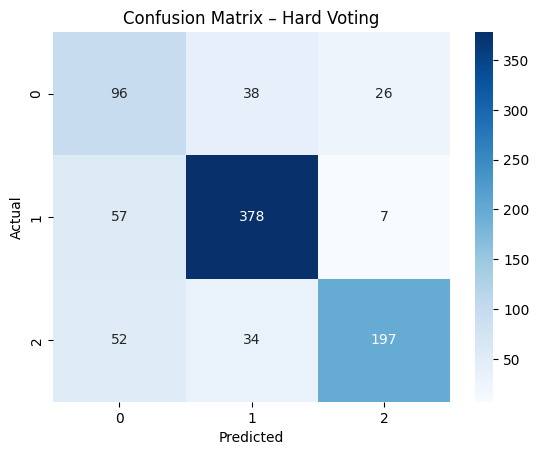

In [104]:
voting_models = {
    "Soft Voting": VotingClassifier(
        estimators=[
            ("lr", models["Logistic Regression"]["model"]),
            ("rf", models["Random Forest"]["model"]),
            ("svm", models["SVM"]["model"]),
            ("xgb", models["XGBoost"]["model"])
        ],
        voting="soft"
    ),

    "Hard Voting": VotingClassifier(
        estimators=[
            ("lr", models["Logistic Regression"]["model"]),
            ("rf", models["Random Forest"]["model"]),
            ("svm", models["SVM"]["model"]),
            ("xgb", models["XGBoost"]["model"])
        ],
        voting="hard"
    )
}
voting_results = []

for name, model in voting_models.items():
    print(f"\n🔹 {name}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ---- Soft Voting ----
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)

        evaluate_model(name, y_test, y_pred)
        roc_auc = None  # optional / skip for multiclass

    # ---- Hard Voting ----
    else:
        y_prob = None
        evaluate_model(name, y_test, y_pred)

    voting_results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted')
    ])




In [107]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1"]
)

voting_df = pd.DataFrame(
    voting_results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1"]
)

final_results = pd.concat([results_df, voting_df], ignore_index=True)
final_results


,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.742373,0.764974,0.742373,0.750313
1,Decision Tree,0.671186,0.675080,0.671186,0.672789
2,Random Forest,0.779661,0.766938,0.779661,0.766789
3,XGBoost,0.775141,0.760766,0.775141,0.760013
4,KNN,0.693785,0.692612,0.693785,0.689813
5,AdaBoost,0.709605,0.584958,0.709605,0.640718
6,SVM,0.744633,0.772120,0.744633,0.753864
7,Soft Voting,0.788701,0.779121,0.788701,0.781087
8,Hard Voting,0.758192,0.778082,0.758192,0.763985
